In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

In [26]:
a = 0.33
beta = 0.95
d = 0.1
A = 1
k0 = 1
b0 = 0
c0 = 0.5

In [3]:
def k_es(a, beta, d, A):
    return ((A*a)/(1/beta - 1 + d))**(1/(1-a))

In [4]:
def c_es(a, beta, d, A):
    k = ((A*a)/(1/beta - 1 + d))**(1/(1-a))
    return A*(k**a)-d*k

# 1. feladat

In [27]:
### egyensúlyi értékek a 2. feladathoz
ke = k_es(a, beta, d, A)
ce = c_es(a, beta, d, A)

print(f'c*={ce}',f'k*={ke}')

c*=1.145874837717893 k*=3.1608601990722356


In [28]:
x = list(range(20))
dk0 = list(map(lambda k: A*(k**a)-d*k, x))

dk0t = list(map(lambda k: 2*(k**a)-d*k, x))
kt = k_es(a, beta, d, 2)
ct = c_es(a, beta, d, 2)

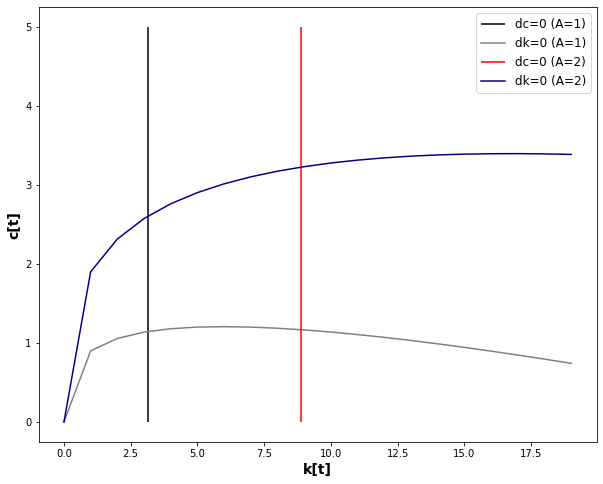

In [29]:
plt.figure(figsize=(10,8))

plt.vlines(x = ke, ymin = 0, ymax = 5, color = 'black')
plt.plot(x, dk0, color = 'gray')
plt.vlines(x = kt, ymin = 0, ymax = 5, color = 'red')
plt.plot(x, dk0t, color = 'darkblue')
plt.xlabel('k[t]', fontsize=14, fontweight='bold')
plt.ylabel('c[t]', fontsize=14, fontweight='bold')
plt.legend(['dc=0 (A=1)', 'dk=0 (A=1)', 'dc=0 (A=2)', 'dk=0 (A=2)'], fontsize = 12)


plt.show()

# 2. feladat

In [20]:
alpha = 0.33
beta = 0.95
delta = 0.1
A = 1
k0 = 1
b0 = 0
c0 = 0.5

In [21]:
c = [c0]*200
k = [k0]*200
r = [A*alpha*(k0**(alpha-1))-delta]*200

for t in range(199):
    k[t+1] = A * k[t]**alpha - c[t] + (1-delta) * k[t]
    r[t+1] = A * alpha * (k[t+1]**(alpha-1)) - delta
    c[t+1] = beta * (1 + r[t+1]) * c[t]

In [24]:
t = range(32)
dko = list(map(lambda x: A*(x**a)-d*x, t))

In [23]:
k

[1,
 1.4,
 1.8248221465359071,
 2.273632965989468,
 2.748282228050474,
 3.251454666116356,
 3.7856327828695227,
 4.352529386079423,
 4.952815529557334,
 5.586043409523214,
 6.250698056817066,
 6.944329703743555,
 7.663730389386368,
 8.405127528070288,
 9.164374975998873,
 9.937128760816814,
 10.71900001586993,
 11.505681763870333,
 12.293049115525168,
 13.077234364025708,
 13.854679578280699,
 14.622169834567739,
 15.376850358879251,
 16.11623072540545,
 16.838178978779744,
 17.540908195714138,
 18.222957626936203,
 18.883170195288685,
 19.520667789178127,
 20.13482549159757,
 20.725245626899497,
 21.291732289749536,
 21.834266840448525,
 22.352984704161855,
 22.84815369422318,
 23.32015398728797,
 23.769459806672224,
 24.196622816088475,
 24.602257185995093,
 24.98702626616126,
 25.35163077849715,
 25.696798431766574,
 26.023274852885866,
 26.331815726808955,
 26.62318003744374,
 26.898124304789008,
 27.157397717848184,
 27.40173806833439,
 27.63186839631763,
 27.848494265461035,
 28.

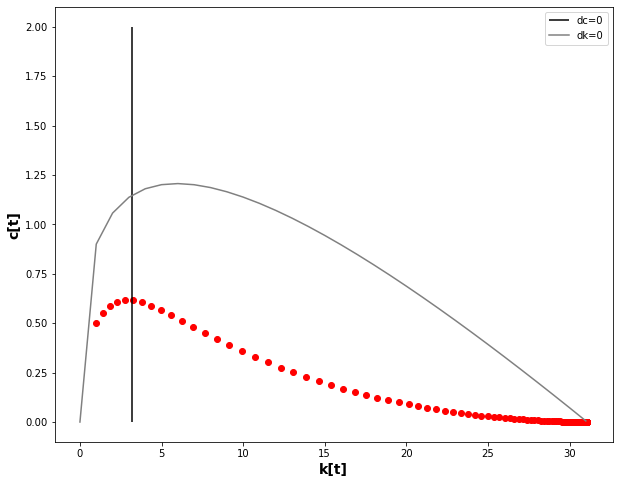

In [25]:
plt.figure(figsize=(10,8))

plt.vlines(x = ke, ymin = 0, ymax = 2, color = 'black')
plt.plot(t, dko, color = 'gray')
plt.legend(['dc=0', 'dk=0'])

plt.xlabel('k[t]', fontsize=14, fontweight='bold')
plt.ylabel('c[t]', fontsize=14, fontweight='bold')

plt.scatter(x=k, y=c, color='red')

plt.show()

In [12]:
for i,n in enumerate(k):
    if i>ke: break
        
print(f'{i+2}. periódusban lép át másik síknegyedbe')

6. periódusban lép át másik síknegyedbe


In [13]:
def nyeregpalya(c0):
    
    kt = 1
    ct = c0
    alpha = 0.33
    beta = 0.95
    delta = 0.1
    A = 1
    ke = ((A*alpha)/(1/beta - 1 + delta))**(1/(1-alpha))
    ce = A*(ke**alpha)-delta*ke
    
    for t in range(50):
        ktp = A * (kt**alpha) - ct + (1-delta)*kt
        ctp = (1 + alpha * A * (ktp**(alpha-1)) - delta) * beta * ct
        kt = ktp
        ct = ctp
        
    e = ce - (1 + alpha * A * (ke**(alpha-1)) - delta) * beta * ctp
    
    return e

In [14]:
c0s = fsolve(nyeregpalya,0.632)

In [15]:
print(f'A fogyasztást {c0s[0]} értékről indítva leszünk a nyeregpályán.')

A fogyasztást 0.6320064096630185 értékről indítva leszünk a nyeregpályán.


In [16]:
c = [c0s[0]]*200
k = [k0]*200
r = [A*alpha*(k0**(alpha-1))-delta]*200

for t in range(49):
    k[t+1] = A * k[t]**alpha - c[t] + (1-delta) * k[t]
    r[t+1] = A * alpha * (k[t+1]**(alpha-1)) - delta
    c[t+1] = beta * (1 + r[t+1]) * c[t]

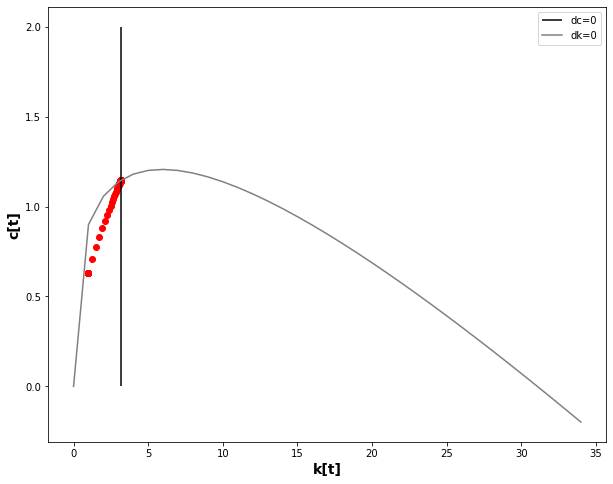

In [17]:
t = range(35)
dko = list(map(lambda x: A*(x**a)-d*x, t))

plt.figure(figsize=(10,8))

plt.vlines(x = ke, ymin = 0, ymax = 2, color = 'black')
plt.plot(t, dko, color = 'gray')
plt.legend(['dc=0', 'dk=0'])

plt.xlabel('k[t]', fontsize=14, fontweight='bold')
plt.ylabel('c[t]', fontsize=14, fontweight='bold')

plt.scatter(x=k, y=c, color='red')

plt.show()